<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 3.A - Programación Dinámica </h2>
</center>
</p>
</div>

<div class="alert alert-danger" style="width:95%; margin:0 auto; padding">
A la hora de crear las matrices de programación dinámica podéis emplear diversas estructuras de datos. A la hora de gestionar matrices, la lista de listas puede ser una buena opción, pero existen librerías como NumPy que hacen una mejor gestión de las matrices.

Podéis consultar aquí la documentación: https://docs.scipy.org/doc/numpy/reference/

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>1- El problema de la mochila</p></h2>
  
  <p> En esta primera sección trabajaremos con el problema de la mochila que ya vimos en los problemas de Greedy. Refrequemos un poco:
</p>
  <center><img src="img/knapsack.png" width=30%></center>
  
  <p>
    Nos encontramos en una habitación en la que hay $N$ objetos, cada cual con un peso $w_1, w_2, w_3 ... w_N$ y un valor $v_1, v_2, v_3 ... v_N$. Disponemos de una mochila que puede soportar una carga máxima de $W$.
    Se busca conseguir llenar la mochila maximizando el valor total de la misma. Es decir queremos encontrar la combinación de objetos $b$ tal que $\arg_{b} \max{\sum_{i=0}^{N}{v_i · b_i}}$ manteniendo siempre cierto que no superamos el peso máximo de la mochila: $\sum_{i=0}^{N}{(w_i · b_i)}\leq W$.
     
</p>
  
Trabajaremos tres variantes de este problema. En el primero, dispondremos solo de un objeto de cada tipo; en otro dispondremos de una cantidad ilimitada de objetos de cada tipo; finalmente, dispondremos de una cantidad limitada $c_1, c_2, c_3 ... c_N$ de cada objeto.


In [1]:
import numpy as np

In [2]:
def dynamic_knapsack(W, D, debug=False): 
    """
    Computes the Knapsack problem using 
    dynamic programming.
    
    Parameters
    ----------
        W, int
            Max backpack weight
            
        D, list
            List of the items in the form of
                [ ... [weight_i, value_i] ... ]
        
        debug, bool (optional, default=False)
            Print some debug code
    
    Returns
    -------
        list
            List with the selected items
    """
    
    # Init the dynamic programming matrix with zeros
    
    n, w = len(D), W
    dp = np.zeros((n + 1, w + 1), dtype=np.int)
    
    for i in range(1, n + 1):
        for j in range(w + 1):
            
            # If the (i-1)-th element weight
            # is greater than the current 
            # max backpack weight, we take
            # the last max
            
            if D[i - 1][0] > j:
                dp[i, j] = dp[i - 1, j]
                continue
            
            # DP step
            # Compute the max from the last one
            # and adding a new item
            
            dp[i, j] = max(dp[i - 1, j], dp[i - 1, j - D[i - 1][0]] + D[i - 1][1])
    
    if debug:
        print(dp[1::])
    
    # Backtracking
    
    res, i = [], n - 1
    
    while w > 0 and i >= 0:
        if debug:
            print(i, dp[i + 1][W], dp[i][W], dp[i + 1][W] != dp[i][W], D[i], w)
        
        if dp[i + 1][W] != dp[i][W]:
            if w - D[i][0] < 0:
                break
            
            res.append(D[i])
            w -= D[i][0]
        
        i -= 1
    
    return [[r[0], r[1]] for r in res]   
    

def dynamic_knapsack_quantities(W, D, debug=False):
    """
    Computes the Knapsack problem using 
    dynamic programming, but the quantity of the 
    items is restricted.
    
    Parameters
    ----------
        W, int
            Max backpack weight
            
        D, list
            List of the items in the form of
                [ ... [weight_i, value_i, quant_i] ... ]
        
        debug, bool (optional, default=False)
            Print some debug code
    
    Returns
    -------
        list
            List with the selected items
    """
    
    # Init the dynamic programming matrix with zeros
    
    n, w = len(D), W
    dp = np.zeros((n + 1, w + 1), dtype=np.int)
    
    for i in range(1, n + 1):
        for j in range(w + 1):
            # If the quantity of the
            # (i-1)-th item is zero,
            # we do not use it :/
            
            if D[i - 1][2] == 0:
                continue
                        
            # If the use of at least one
            # of those items is greater than
            # the current max weight (j)
            # then we take the las one
            
            if D[i - 1][0] > j:
                dp[i, j] = dp[i - 1, j]
                continue
            
            # DP step
            # Compute the maximum quantity of 
            # items we can add
            
            q_min = min(D[i - 1][2], j // D[i - 1][0]) + 1
            
            # Loop over all possible quantities
            # and pick the greater one
            
            for q in range(1, q_min):
                dp[i, j] = max(dp[i - 1, j], dp[i - 1, j - D[i - 1][0] * q] + D[i - 1][1] * q)            
    
    if debug:
        print(dp[1::])
    
    # Backtracking
    
    res, i = [], n - 1
    
    while w > 0 and i >= 0:
        if dp[i + 1][W] != dp[i][W]:
            q = max(q for q in range(0, D[i][2] + 1) if q * D[i][0] <= w)
            
            if q > 0:
                res.append([D[i][0], D[i][1], q])
                w -= D[i][0] * q
        
        i -= 1
    
    return res 


def dynamic_knapsack_infinite(W, D, debug=False):
    """
    Computes the Knapsack problem using 
    dynamic programming, but the quantity of the items
    is not restricted.
    
    Parameters
    ----------
        W, int
            Max backpack weight
            
        D, list
            List of the items in the form of
                [ ... [weight_i, value_i] ... ]
        
        debug, bool (optional, default=False)
            Print some debug code
    
    Returns
    -------
        list
            List with the selected items
    """
    
    # Init the dynamic programming matrix with zeros
    
    n, w = len(D), W
    dp = np.zeros((n + 1, w + 1), dtype=np.int)
    
    for i in range(1, n + 1):
        for j in range(w + 1):
                        
            # If the use of at least one
            # of those items is greater than
            # the current max weight (j)
            # then we take the las one
            
            if D[i - 1][0] > j:
                dp[i, j] = dp[i - 1, j]
                continue
            
            # DP step
            # Compute while the wheigth of the
            # added items is smaller or equal to the
            # max avaliable
            
            q = 1
            
            while q * D[i - 1][0] <= w:
                dp[i, j] = max(dp[i - 1, j], dp[i - 1, j - D[i - 1][0] * q] + D[i - 1][1] * q) 
                q += 1
    
    if debug:
        print(dp[1::])
    
    # Backtracking
    
    res, i = [], n - 1
    
    while w > 0 and i >= 0:
        if dp[i + 1][W] != dp[i][W]:
            q = 0
            
            while q * D[i][0] < w:
                q += 1
                
                if q * D[i][0] > w:
                    q -= 1
                    break
                        
            if q > 0:
                res.append([D[i][0], D[i][1], q])
                w -= D[i][0] * q
        
        i -= 1
    
    return res  

In [3]:
from utils import random_objects
from random import randint

# random_objects genera una lista de objetos, 
# cada uno representado como [peso,valor] o [peso,valor,cantidad].
# Su único parámetro es un booleano opcional que indica si la 
# cantidad de objetos es finita (False) o infinita (True, por defecto)

W, D = randint(10, 500), random_objects(False)
# W, D = 10, [[4, 5, 1], [8, 10, 1], [3, 3, 3], [5, 2, 2], [2, 3, 5]]


s_n = dynamic_knapsack(W, D, debug=False)
s_q = dynamic_knapsack_quantities(W, D, debug=False)
s_i = dynamic_knapsack_infinite(W, D, debug=False)

assert sum([x[0] for x in s_n]) <= W
assert sum([x[0] * x[2] for x in s_q]) <= W
assert sum([x[0] * x[2] for x in s_i]) <= W

print("Ran 3 tests: OK.")

Ran 3 tests: OK.


<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Cuestiones</h3></p> </center> </div>

<ul>
    <li>¿En qué casos se encuentra solución óptima al problema?</li>
    <li>Explica las soluciones planteadas y analiza su complejidad. Comparalo con las implementaciones greedy.</li>
</ul>

__Escribe aquí tus respuestas__

### Pregunta 1

En **tots** els casos s'arriba a la solució óptima.

### Pregunta 2

#### `dynamic_kapsac`

És l'algortime estàndard [1].

La complexitat és $O(n W)$, on $n$ denota el nombre d'objectes i $W$ el pes màxim.

#### `dynamic_knapsac_quantities`

És semblant al cas anterior, però es computa la quantitat màxima que es pot utilitzar de cada objecte en cada pas tal que aquesta no excedeixi el màxim disponible.

La complexitat és $O(n W^2)$, on $n$ denota el nombre d'objectes i $W$ el pes màxim.


#### `dynamic_kapsac_infinite`

És gairebé igual que el cas anterior, però sense restringir la quantitat.
Només es comprova que la suma final és més petita que el pes màxim en cada pas.

La complexitat és $O(n W^2)$, on $n$ denota el nombre d'objectes i $W$ el pes màxim.


#### Nota

Al final de cada funció, donat que hem de retornar una llista amb els objectes escollits, es realitza un *backtracking* per a trobar-los.
La complexitat d'aquestes operacions no s'han tingut en compte a l'hora d'enunciar les complexitats als apartats anteriors.

#### Diferències respecte *greedy*

En el cas de DP podem assegurar trobar la solució óptima, a costa de una complexitat superior.


### Referències

**[1]** [Wikipedia: Knapsack problem](https://en.wikipedia.org/wiki/Knapsack_problem#0/1_knapsack_problem)

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2 - Algoritmo Floyd-Warshall</p></h2>
  
  <p> El algoritmo Floyd-Warshall es un algoritmo de programación dinámica que se emplea para encontrar los caminos mínimos en un grafo con pesos (que no tenga ciclos negativos) entre todos los pares de nodos. Se basa en ir construyendo una matriz con caminos intermedios entre trios de nodos. Podéis ver más información y consultar el pseudocódigo <a href="https://es.wikipedia.org/wiki/Algoritmo_de_Floyd-Warshall">aquí</a>.</p>


In [4]:
from collections import defaultdict

def floyd_warshall(G, directed=True):
    """
    Floyd-Warshall algorithm implementation.
    
    Parameters
    ----------
        G, nx.graph
        
    Returns
    -------
        None
    """
    
    # We use this "hack" to make the access
    # to elements not in the dict-of-dicts
    # infinity by default
    
    dist = defaultdict(lambda : defaultdict(lambda: np.infty))
    
    
    # Init the diagonal to zeros
    # and the edges of the graph
    # a.k.a. create the adjacency dict-of-dicts
    
    for u in G:
        dist[u][u] = 0

    for u, v, d in G.edges(data=True):
        e_weight = d.get("weight", 1.0)
        dist[u][v] = min(e_weight, dist[u][v])
        
        if not directed:
            dist[v][u] = min(e_weight, dist[v][u])
    
    # The Floyd-Warshall algorithm
    
    for w in G:
        for u in G:
            for v in G:
                
                # DP step
                
                if dist[u][v] > dist[u][w] + dist[w][v]:
                    dist[u][v] = dist[u][w] + dist[w][v]
    
    # Update the graph with the minimal
    # distances
    
    for v in G:
        for w in G:
            G.nodes[v][w] = dist[v][w]

From 0 to {0: 0, 1: inf, 2: inf, 3: inf, 4: 0.39, 5: inf, 6: inf, 7: 0.621, 8: 0.75, 9: 1.2890000000000001}
From 1 to {0: inf, 1: 0, 2: 0.116, 3: inf, 4: inf, 5: 0.609, 6: 0.711, 7: inf, 8: inf, 9: 0.505}
From 2 to {0: inf, 1: inf, 2: 0, 3: inf, 4: inf, 5: inf, 6: 0.595, 7: inf, 8: inf, 9: 0.389}
From 3 to {0: inf, 1: inf, 2: inf, 3: 0, 4: inf, 5: inf, 6: inf, 7: inf, 8: inf, 9: 0.547}
From 4 to {0: inf, 1: inf, 2: inf, 3: inf, 4: 0, 5: inf, 6: inf, 7: inf, 8: 0.36, 9: 0.899}
From 5 to {0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: 0, 6: inf, 7: inf, 8: inf, 9: 0.21}
From 6 to {0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: 0, 7: inf, 8: inf, 9: inf}
From 7 to {0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: 0, 8: inf, 9: inf}
From 8 to {0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf, 8: 0, 9: inf}
From 9 to {0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf, 8: inf, 9: 0}


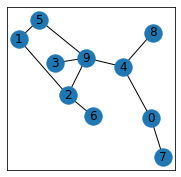

In [5]:
from utils import random_graph, draw_graph

G = random_graph(10, 10)
floyd_warshall(G)

for node in G.nodes:
    print(f"From {node} to {G.nodes[node]}")
    
draw_graph(G, 3)

<div class="alert alert-warning" style="width:80%; margin:0 auto; padding">
<center><p><h3> Cuestiones</h3></p> </center> </div>

#### Analiza la complejidad del algoritmo

La complexitat es $O(n^3)$, on $n$ denota el nombre de nodes del graf.